In [1]:
import os, time, sys
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import clicfast2023.clicfast2023 as clicfast2023
import clicfast2023.analysis.interpreter as interpreter
import importlib
importlib.reload(interpreter)
import clicfast2023.analysis.event_builder as event_builder
importlib.reload(event_builder)

!ping -c 1 192.168.10.16

dut = clicfast2023.Clicfast2023()
dut.init()

PING 192.168.10.16 (192.168.10.16) 56(84) bytes of data.
64 bytes from 192.168.10.16: icmp_seq=1 ttl=64 time=0.247 ms

--- 192.168.10.16 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 0.247/0.247/0.247/0.000 ms


2024-04-15 17:44:01,320 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing spi_inj (firmware version: 2), module basil.HL.spi, base_addr 0x10
2024-04-15 17:44:01,321 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing inj (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x100
2024-04-15 17:44:01,322 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing trig (firmware version: 1), module clicfast2023.pulse_gen_delay, base_addr 0x2c0
2024-04-15 17:44:01,322 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing sync (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x140
2024-04-15 17:44:01,323 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gate (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x180
2024-04-15 17:44:01,323 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gpio (firmware version: 0), module basil.HL.gpio, base_addr 0x20

In [2]:
col = 0
comp = 1
delay = 0
dut.set_sync()
dut.set_inj(inj_n=0, inj_delay=10240+delay, inj_width=10240-delay, ext=True)
dut.set_triginj(inj_n=0, inj_delay=10240+delay, inj_width=10240-delay, ext=True)
dut.set_inj_amp(0.5, unit="V")
dut.inject_trig()
dut.set_en_ampout([col])
dut.set_en_inj([col])
dut.set_en_hitbus([col])

dut.PixelConf['en_comp'][:, :] = 0xFF
en_comp = np.copy(dut.PixelConf['en_comp'])
en_comp[:, :] =0
en_comp[col, :] =1  ## enable all comp
dut.set_en_comp(en_comp)

2024-04-15 17:44:03,387 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0
2024-04-15 17:44:03,388 - root - [INFO    ] (MainThread) set_inj: inj_width=10240 inj_delay=10240 inj_n=0 ext=1
2024-04-15 17:44:03,390 - root - [INFO    ] (MainThread) set_triginj: trig_width=10240 trig_delay=10240 trig_n=0 ext=1
2024-04-15 17:44:03,390 - root - [INFO    ] (MainThread) inj_amp: 2651
2024-04-15 17:44:03,396 - root - [INFO    ] (MainThread) set_en_ampout: en_ampout_col=0x00000001
2024-04-15 17:44:03,401 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001
2024-04-15 17:44:03,406 - root - [INFO    ] (MainThread) set_en_hitbus: en_hitbus_col=0x1ffffffe
2024-04-15 17:44:03,416 - root - [INFO    ] (MainThread) _write_conf row0 en_comp[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-04-15 17:44:03,426 - root - [INFO    ] (MainThread) _write_conf row1 en_c

In [3]:
dut['inj'].get_configuration()

{'EN': 1, 'DELAY': 10240, 'WIDTH': 10240, 'REPEAT': 0}

In [3]:
dut.set_conf(VDACTh=0x70,
             VDACBL=0x88,
             BLResP=1,
             IPBigFine=19,
             IPSmallFine=7,
             IPFoll=10,
             IPDAC=0,
             NFB2=1,
             PFB1=5)
dut.set_inj(inj_n=1, inj_delay=10240+delay, inj_width=10240-delay, ext=False)
dut.set_triginj(inj_n=100, inj_delay=(10240+delay)*4, inj_width=(10240-delay)*4, ext=True)
#dut['inj'].set_phase(2)
dut.inject()
dut.inject_trig()
dut.set_rx(False)
dut.set_sync(auto_sync=True)
dut.set_ts_trig(True)
dut.set_rx(True)
dut.mask_rx(True)

2024-04-15 17:44:08,899 - root - [INFO    ] (MainThread) set_conf:VDACTh=112VDACBL=136BLResP=1IPBigFine=19IPSmallFine=7IPFoll=10IPDAC=0NFB2=1PFB1=5
2024-04-15 17:44:08,900 - root - [INFO    ] (MainThread) set_inj: inj_width=10240 inj_delay=10240 inj_n=1 ext=0
2024-04-15 17:44:08,902 - root - [INFO    ] (MainThread) set_triginj: trig_width=40960 trig_delay=40960 trig_n=100 ext=1
2024-04-15 17:44:09,004 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0


In [4]:
dut.get_data(inj='trig')

array([ 287091200, 2466250752, 2449480667, ...,  319158819,  337713154,
        352345180], dtype=uint32)

In [47]:
dut['trig'].get_configuration(), dut['inj'].get_configuration()

({'EN': 1,
  'EN_OUT': 63,
  'DELAY': 40960,
  'WIDTH': 40960,
  'REPEAT': 100,
  'FINE_DELAY_LD': 0,
  'FINE_DELAY': 0,
  'FINE_DELAY_CINV': 0,
  'FINE_DELAY_VALUE': 31,
  'DEBUG': 0},
 {'EN': 0, 'DELAY': 10240, 'WIDTH': 10240, 'REPEAT': 1})

In [11]:
import clicfast2023.analysis.interpreter as interpreter
import importlib
importlib.reload(interpreter)
import clicfast2023.analysis.event_builder as event_builder
importlib.reload(event_builder)

dat = []
raw_all = []
for ii in range(4):
    dut['trig'].DELAY = (10240+delay)*4+ii
    dut['trig'].WIDTH = (10240+delay)*4-ii
    for i in range(0,32,1):
        dut['trig'].set_phase(i)
        dut.get_data_now()
        #print(dut['trig'].get_phase())
        raw_all.append(dut.get_data(inj='trig'))
        hit, ts_inj, ts_trig = interpreter.raw2list(raw_all[-1])
        ev = event_builder.hit2ev(hit, ts_trig)
        dat.append(ev)

for i, d in enumerate(raw_all):
    if i ==0:
        tmp = np.copy(d)
    else:
        np.append(tmp,d)
fname = clicfast2023.mk_fname('raw.npy')
np.save(fname, tmp)
print(fname)

2024-04-12 19:18:55,367 - root - [INFO    ] (MainThread) BuildHit.run() n of error_hit=5
2024-04-12 19:18:56,043 - root - [INFO    ] (MainThread) BuildHit.run() n of error_hit=1
2024-04-12 19:18:56,216 - root - [WARNING ] (MainThread) get_data: error status=0x0 fifo_size=0 loop=13 ts=300/300
2024-04-12 19:18:57,218 - root - [WARNING ] (MainThread) get_data: error status=0x0 fifo_size=0 loop=13 ts=300/300
2024-04-12 19:18:58,393 - root - [INFO    ] (MainThread) BuildHit.run() n of error_hit=1
2024-04-12 19:18:59,732 - root - [INFO    ] (MainThread) BuildHit.run() n of error_hit=1
2024-04-12 19:19:01,413 - root - [INFO    ] (MainThread) BuildHit.run() n of error_hit=1
2024-04-12 19:19:02,077 - root - [INFO    ] (MainThread) BuildHit.run() n of error_hit=1
2024-04-12 19:19:05,942 - root - [WARNING ] (MainThread) get_data: error status=0x0 fifo_size=0 loop=13 ts=300/300
2024-04-12 19:19:06,781 - root - [INFO    ] (MainThread) BuildHit.run() n of error_hit=1
2024-04-12 19:19:12,144 - root -

/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/output/raw/20240412_191935_raw.npy


6 1199 [11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12] [ 99 100 100 100 100 100 100 100 100 100 100 100] [[0]] 1188
56 1199 [11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12] [ 99 100 100 100 100 100 100 100 100 100 100 100] [[0]] 1188
61 1199 [11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12

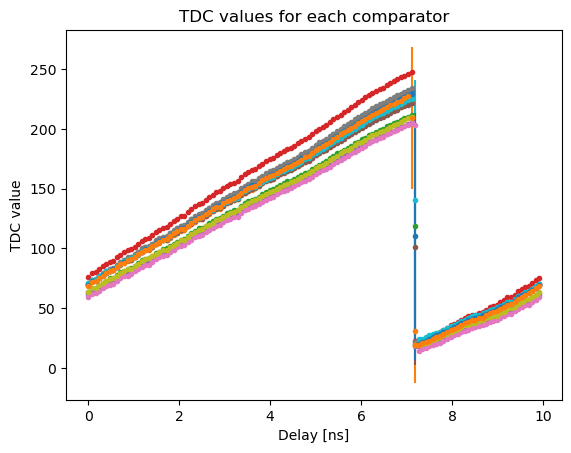

In [31]:
#dat=np.load('/home/thirono/Documents/data/2024/2024-04-12/20240412_190909_raw.npy')
#print(fname)
tdc = []
for i,d in enumerate(dat):
    if len(d)!=1200:
        print(i, len(d), np.bincount(d['event_number']),np.bincount(d['comp']), end=' ')
        while True:
            uni, idx, cnt = np.unique(d['event_number'], return_index=True, return_counts=True)
            arg = np.argwhere(cnt!=12)
            if len(arg)==0:
                break
            d=d[d['event_number']!=uni[arg[0,0]]]
            print(arg, len(d))
    cnt = np.bincount(d['comp'])
    n_ev=len(d)//12
    if not np.all(cnt==n_ev):
        print('comp error', i, cnt, n_ev)
        continue
    d = np.reshape(d, [n_ev,12])
    sum = np.sum(d['tdc'], axis=1)
    one = np.average(d['tdc'], axis=0)
    onestd = np.std(d['tdc'], axis=0)
    tdc.append(np.concatenate((np.array([i,np.average(sum),np.std(sum)]),
                               one,
                               onestd,
                               sum[-99:])
    ))
    #break
tdc = np.array(tdc)
for i in range(12):
    plt.errorbar(tdc[:,0]*2.5/32, tdc[:,3+i],yerr=tdc[:,3+12+i],fmt='.')
plt.xlabel('Delay [ns]')
plt.ylabel('TDC value')
plt.title('TDC values for each comparator')


for i, d in enumerate(dat):
    if i ==0:
        tmp = np.copy(d)
    else:
        np.append(tmp,d)
np.save(fname+"1", tmp)

Text(0, 0.5, 'Average')

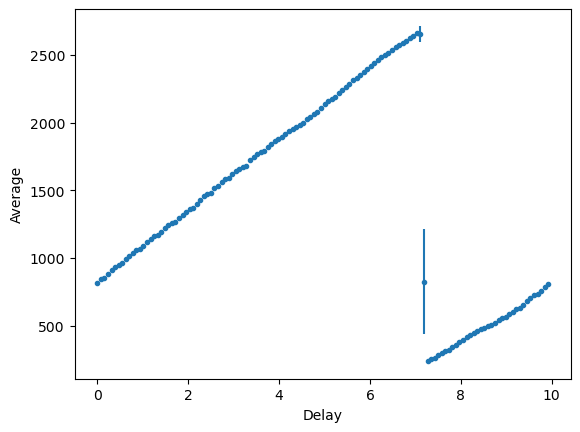

In [52]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharex=True)
ax.errorbar(tdc[:,0]*2.5/32, tdc[:,1],yerr=tdc[:,2], fmt='.')
#ax[1].plot(tdc[:,0]*2.5/32, tdc[:,2], '.')
#ax[1].set_yscale('log')
ax.set_xlabel('Delay')
ax.set_ylabel('Average')
#ax[1].set_ylabel('STD')


In [1]:
toaall = [np.empty(0, dtype='u2')]*12
tdcall = [np.empty(0, dtype='u1')]*12
tap = [np.empty(0, dtype='u1')]*12
for i, d in enumerate(dat):
    for comp in range(12):
        tdcall[comp] = np.append(tdcall[comp], d[d['comp']==comp]['tdc'])
        toaall[comp] = np.append(toaall[comp], d[d['comp']==comp]['toa'])
        tap[comp] = np.append(tap[comp], np.ones(len(d[d['comp']==comp]['tdc']))*i)
for comp in range(12):
    plt.plot(tap[comp], tdcall[comp], '.')
#plt.xlim(90,94)
#plt.ylim(70, 75)

NameError: name 'np' is not defined

(65.0, 90.0)

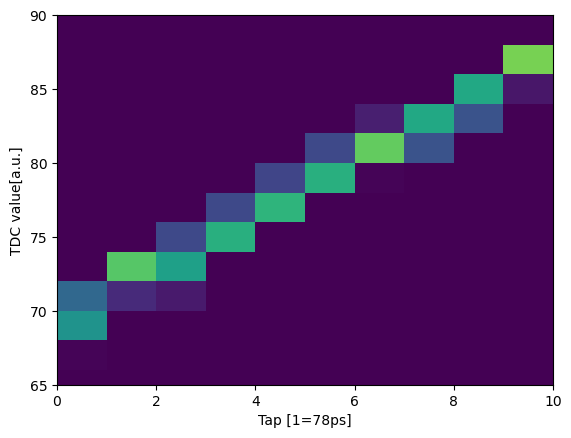

In [120]:
plt.hist2d(tap[5], tdcall[5], bins=(np.arange(0,120,1), np.arange(0,256,2)))
plt.xlabel('Tap [1=78ps]')
plt.ylabel('TDC value[a.u.]')
plt.xlim(0,10)
plt.ylim(65,90)


In [147]:
tap[5][(tap[5]!=91) & (tap[5]!=92)]
tdcall[5][(tap[5]!=91) & (tap[5]!=92)]


array([69, 71, 71, ..., 69, 71, 69], dtype=uint8)

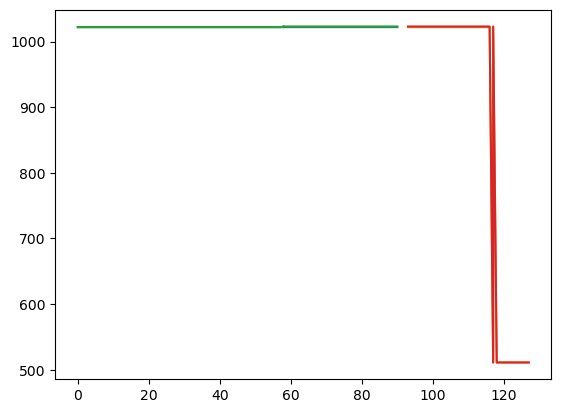

In [148]:
tap[5][tap[5]<91]
tdcall[5][tap[5]<91]
plt.plot(tap[5][tap[5]<91], (toaall[5][tap[5]<91]-1)//2)
plt.plot(tap[5][tap[5]>92], (toaall[5][tap[5]>92]-1)//2)
plt.plot(tap[5][tap[5]<91], (toaall[5][tap[5]<91])//2)
plt.plot(tap[5][tap[5]>92], (toaall[5][tap[5]>92])//2)

(120.0, 130.0)

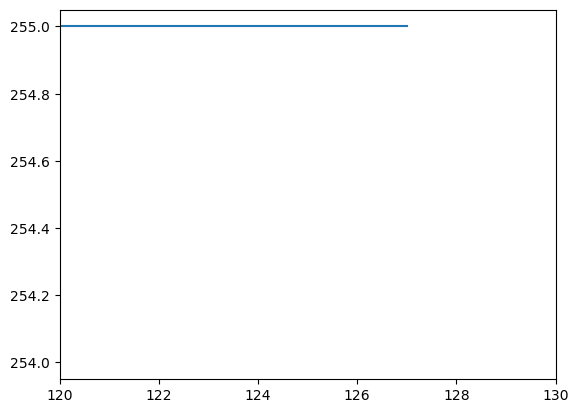

In [152]:
plt.plot(tap[5][tap[5]>92], (toaall[5][tap[5]>92]) &  0xFF)
plt.xlim(120, 130)

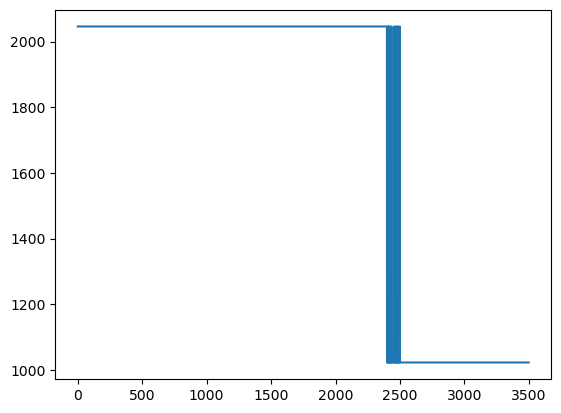

In [159]:
plt.plot(toaall[5][tap[5]>92])

In [153]:
toaall[5][tap[5]>92]
for i, d in enumerate(dat):
    a = d[
        np.bitwise_and(d['col']==0 , d['comp']==0)
    ]
    tmp.append(a[0]['ts3'])
plt.plot(np.arange(32), tmp[:32])
plt.plot(np.arange(32,32+32, 1), tmp[32:32+32]+tmp[31])

tmp[31],tmp[32]

dat[31][0], dat[32][0], dat[64][0], dat[64+32][0], 

AttributeError: 'numpy.ndarray' object has no attribute 'append'

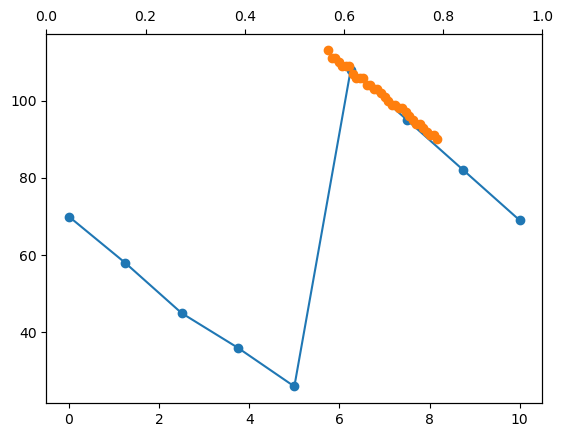

In [46]:
fig,ax = plt.subplots()
div=[70, 58, 45, 36, 26, 108, 95, 82, 69]
delay = [ 90,  91,  91,  92,  93,  94,  94,  95,  96,  97,  98,  98,  99,
        99, 100, 101, 102, 103, 103, 104, 104, 106, 106, 106, 107, 109,
       109, 109, 110, 111, 111, 113]
ax2 = ax.twiny()
ax.plot(np.arange(9)*10./8., div, 'o-')
ax.plot(np.arange(32)*1000./200./32./2.+5.75, delay[::-1], 'o-', label='delay') ## 200MHz clock as a reference clock


#plt.plot([32, 27, 23, 23, 22, 50, 43, 37, 31], 'o-', label='big32')  ## ts3==7bits
#plt.plot([27, 23, 23, 22, 22, 48, 39, 33, 26], 'o-', label='big48')  ## ts3==7bits

In [160]:
dat=np.load('/home/thirono/Documents/data/2024/2024-04-12/20240412_190909_raw.npy')